In [1]:
#!pip install pandas 
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn
#!pip install numpy
#!pip install scipy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
from scipy.stats import linregress


In [9]:
df = pd.read_csv('epa-sea-level.csv')

LinregressResult(slope=np.float64(0.0630445840121348), intercept=np.float64(-119.06594196773978), rvalue=np.float64(0.984757131182585), pvalue=np.float64(3.788696979113155e-102), stderr=np.float64(0.000969211871328715), intercept_stderr=np.float64(1.8869433812425225))


<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

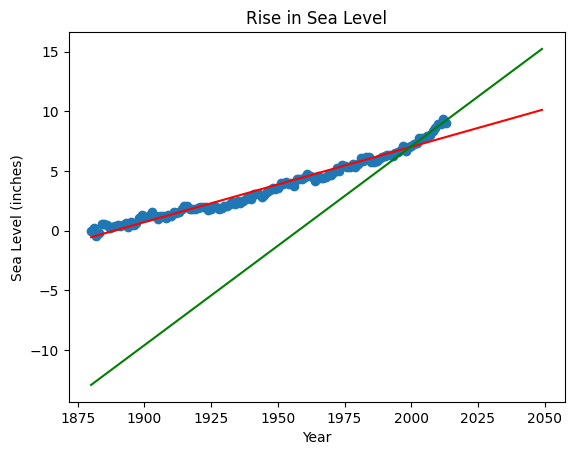

In [13]:
def draw_plot():
    # Read data from 
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    
    
    # Create scatter plot
    fig, ax = plt.subplots()
    plt.scatter(x, y)


    # Create first line of best fit
    res = linregress(x, y)
    print(res)
    x_pred = pd.Series([i for i in range(1880,2050)])
    y_pred = res.slope*x_pred + res.intercept
    plt.plot(x_pred, y_pred, "r")

    # Create second line of best fit
    new_df = df.loc[df['Year'] >= 2000]
    new_x = new_df['Year']
    new_y = new_df['CSIRO Adjusted Sea Level']
    res_2 = linregress(new_x, new_y)
    x_pred2 = pd.Series([i for i in range(1880,2050)])
    y_pred2 = res_2.slope*x_pred2 + res_2.intercept
    plt.plot(x_pred2, y_pred2, 'green')

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

draw_plot()